# Add auxiliary features to the dataset

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd
from churn_pred.preprocessing import preprocess_data, preprocess_text
import spacy_fastlang

In [30]:
df_pd_temp = pd.read_csv("data/dataset.csv")
df_pd_temp.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,I can not link my card to any third-party plat...,160980.03,1,0,0,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,"Last week, I reached out to my bank's support ...",151762.74,1,0,1,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,NaN,82767.42,1,1,0,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,NaN,128743.80,1,0,0,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,"Yo, I gotta give some love to this bank's cust...",133550.67,1,1,1,46941.41,0


In [31]:
df_pd_temp.iloc[105:106]

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
105,2866,15590228,Greenwalt,715,France,Male,21,6,Hsi,76467.16,1,1,1,173511.72,0


In [ ]:
df_pd.drop(columns=["RowNumber"], inplace=True)

In [ ]:
df_pd = preprocess_data.hemisphere(df=df_pd, cc_col="Country")
df_pd = preprocess_data.gdppc(df=df_pd, country_name_col="Country")

In [8]:
df_pd["CustomerFeedback"] = df_pd["CustomerFeedback"].astype(str)

## Sentiment analysis

### Cleaning and langauge detection

In [9]:
df_pd = preprocess_text.text_cleaning(df=df_pd, text_col="CustomerFeedback")
df_pd = preprocess_text.language_detection(
    df=df_pd, text_col="CustomerFeedback", model_type="fasttext"
)

Cleaning Progress: 100%|██████████| 10000/10000 [00:53<00:00, 185.91it/s]


In [14]:
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score
0,747,15787619,Hsieh,844,France,Male,18,2,link card _IS_PUNCT_ party platform _IS_PUNCT_,160980.03,1,0,0,145936.28,0,en,0.786177
1,1620,15770309,McDonald,656,France,Male,18,10,week _IS_PUNCT_ reach bank support team confus...,151762.74,1,0,1,127014.32,0,en,0.911405
2,1679,15569178,Kharlamov,570,France,Female,18,4,nan,82767.42,1,1,0,71811.90,0,ht,0.974604
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,nan,128743.80,1,0,0,197322.13,0,ht,0.974604
4,2137,15621893,Bellucci,727,France,Male,18,4,Yo _IS_PUNCT_ get to love bank customer servic...,133550.67,1,1,1,46941.41,0,en,0.758962


In [13]:
df_pd[df_pd["CustomerFeedback"].astype(str) != "nan"][
    "CustomerFeedback_language"
].unique()

array(['en'], dtype=object)

In [28]:
df_pd[
    (df_pd["CustomerFeedback"].astype(str) != "nan")
    & (df_pd["CustomerFeedback_language_score"] < 0.5)
]

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score
105,2866,15590228,Greenwalt,715,France,Male,21,6,hsi,76467.16,1,1,1,173511.72,0,en,0.124504
6270,7107,15723989,Carroll,646,France,Male,40,5,fund accessible anticipate date _IS_PUNCT_ _IS...,93680.43,2,1,1,179473.26,0,en,0.468742


<Axes: ylabel='Frequency'>

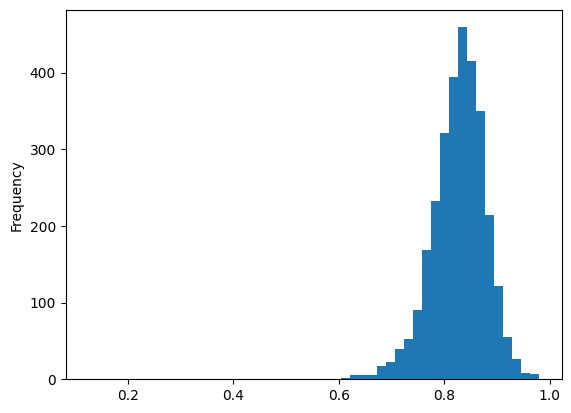

In [29]:
df_pd[df_pd["CustomerFeedback"].astype(str) != "nan"][
    "CustomerFeedback_language_score"
].plot.hist(bins=50)

In [36]:
df_pd.loc[105, ["CustomerFeedback"]] = "nan"

### Sentiment analysis

In [40]:
from transformers import pipeline

In [44]:
dfc[text_col + "_sentiment_0"] = pipe(dfc[text_col].astype(str).to_list())

KeyboardInterrupt: 

In [41]:
dfc = df_pd.copy()

text_col = "CustomerFeedback"

pipe = pipeline(
    "text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)
dfc[text_col + "_sentiment_0"] = pipe(dfc[text_col].astype(str).to_list())
pipe = pipeline(
    "text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment"
)
dfc[text_col + "_sentiment_1"] = pipe(dfc[text_col].astype(str))
pipe = pipeline(
    "text-classification",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
)
dfc[text_col + "_sentiment_2"] = pipe(dfc[text_col].astype(str))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [39]:
df_pd = preprocess_text.sentiment_analysis(df=df_pd, text_col="CustomerFeedback")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).